In [ ]:
!pip install kaggle

In [1]:
#To import kaggle json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajivenkat22","key":"60917da3f17a49a6499fa30f13aaf954"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Download FER2013 dataset
!kaggle datasets download -d damnithurts/fer2013-dataset-images

Dataset URL: https://www.kaggle.com/datasets/damnithurts/fer2013-dataset-images
License(s): CC0-1.0
 86% 52.0M/60.3M [00:00<00:00, 274MB/s]
100% 60.3M/60.3M [00:00<00:00, 273MB/s]


In [4]:
#Unzip the downloaded dataset and store in /content/dataset path
!unzip fer2013-dataset-images.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/sad/Training_65242339.jpg  
  inflating: /content/dataset/train/sad/Training_65267116.jpg  
  inflating: /content/dataset/train/sad/Training_65275626.jpg  
  inflating: /content/dataset/train/sad/Training_6529266.jpg  
  inflating: /content/dataset/train/sad/Training_65329617.jpg  
  inflating: /content/dataset/train/sad/Training_65338712.jpg  
  inflating: /content/dataset/train/sad/Training_65338797.jpg  
  inflating: /content/dataset/train/sad/Training_65387162.jpg  
  inflating: /content/dataset/train/sad/Training_65404494.jpg  
  inflating: /content/dataset/train/sad/Training_65426218.jpg  
  inflating: /content/dataset/train/sad/Training_65430136.jpg  
  inflating: /content/dataset/train/sad/Training_65437377.jpg  
  inflating: /content/dataset/train/sad/Training_6545735.jpg  
  inflating: /content/dataset/train/sad/Training_65463385.jpg  
  inflating: /content/dataset/train/sad/Training_654739

In [5]:
#Path to fetch data
import os

base_dir = '/content/dataset'
train_path = os.path.join(base_dir, 'train')
test_path = os.path.join(base_dir, 'test')

In [ ]:
train_path

'/content/dataset/train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load images from directories for Training
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=32,
    class_mode='categorical'
)
# Load images from directories for Validation
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=32,
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
#Pretrained VGG model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers: #Freeze layers in Base model from getting modified
    layer.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=10)
history = model.fit(train_generator, validation_data=validation_generator, epochs=30,callbacks=[early_stopping])

Epoch 1/30
718/718 [==============================] - 549s 763ms/step - loss: 2.5762 - accuracy: 0.3294 - val_loss: 1.8315 - val_accuracy: 0.4137
Epoch 2/30
718/718 [==============================] - 549s 765ms/step - loss: 1.7558 - accuracy: 0.3936 - val_loss: 1.6263 - val_accuracy: 0.4456
Epoch 3/30
718/718 [==============================] - 550s 766ms/step - loss: 1.6541 - accuracy: 0.4090 - val_loss: 1.5832 - val_accuracy: 0.4581
Epoch 4/30
718/718 [==============================] - 551s 767ms/step - loss: 1.6114 - accuracy: 0.4215 - val_loss: 1.5350 - val_accuracy: 0.4583
Epoch 5/30
718/718 [==============================] - 551s 767ms/step - loss: 1.5955 - accuracy: 0.4212 - val_loss: 1.5230 - val_accuracy: 0.4583
Epoch 6/30
718/718 [==============================] - 552s 769ms/step - loss: 1.5761 - accuracy: 0.4284 - val_loss: 1.5142 - val_accuracy: 0.4564
Epoch 7/30
718/718 [==============================] - 553s 770ms/step - loss: 1.5702 - accuracy: 0.4298 - val_loss: 1.5204 -

718/718 [==============================] - 453s 630ms/step


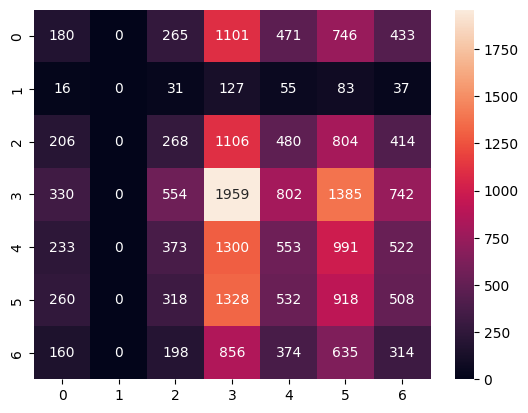

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_train_pred = model.predict(train_generator)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true = train_generator.classes

cm_train = confusion_matrix(y_train_true, y_train_pred_classes)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
     brightness_range=[0.8, 1.2]
)


# Load images from directories for training
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

# Load images from directories for Validation
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=25)
vgg_history = model.fit(train_generator, validation_data=validation_generator, epochs=100,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
1436/1436 [==============================] - 735s 511ms/step - loss: 2.6358 - accuracy: 0.2867 - val_loss: 2.0590 - val_accuracy: 0.3832 - lr: 1.0000e-04
Epoch 2/100
1436/1436 [==============================] - 731s 509ms/step - loss: 1.9576 - accuracy: 0.3718 - val_loss: 1.7681 - val_accuracy: 0.4247 - lr: 1.0000e-04
Epoch 3/100
1436/1436 [==============================] - 729s 508ms/step - loss: 1.7481 - accuracy: 0.3943 - val_loss: 1.6096 - val_accuracy: 0.4515 - lr: 1.0000e-04
Epoch 4/100
1436/1436 [==============================] - 751s 523ms/step - loss: 1.6375 - accuracy: 0.4107 - val_loss: 1.5607 - val_accuracy: 0.4358 - lr: 1.0000e-04
Epoch 5/100
1436/1436 [==============================] - 739s 515ms/step - loss: 1.5884 - accuracy: 0.4172 - val_loss: 1.4848 - val_accuracy: 0.4700 - lr: 1.0000e-04
Epoch 6/100
1436/1436 [==============================] - 732s 510ms/step - loss: 1.5483 - accuracy: 0.4262 - val_loss: 1.4814 - val_accuracy: 0.4712 - lr: 1.0000e-04
Epoc

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
     brightness_range=[0.8, 1.2]
)

# Load images from directories for Training
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

# Load images from directories for Validation
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=25)
vgg_history = model.fit(train_generator, validation_data=validation_generator, epochs=100,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
1436/1436 [==============================] - 726s 505ms/step - loss: 3.0849 - accuracy: 0.2264 - val_loss: 2.5506 - val_accuracy: 0.2796 - lr: 1.0000e-04
Epoch 2/100
1436/1436 [==============================] - 722s 503ms/step - loss: 2.3582 - accuracy: 0.2906 - val_loss: 2.0953 - val_accuracy: 0.3475 - lr: 1.0000e-04
Epoch 3/100
1436/1436 [==============================] - 718s 500ms/step - loss: 2.0351 - accuracy: 0.3419 - val_loss: 1.8945 - val_accuracy: 0.4029 - lr: 1.0000e-04
Epoch 4/100
1436/1436 [==============================] - 725s 505ms/step - loss: 1.8565 - accuracy: 0.3642 - val_loss: 1.7278 - val_accuracy: 0.4271 - lr: 1.0000e-04
Epoch 5/100
1436/1436 [==============================] - 724s 504ms/step - loss: 1.7438 - accuracy: 0.3777 - val_loss: 1.6462 - val_accuracy: 0.4285 - lr: 1.0000e-04
Epoch 6/100
1436/1436 [==============================] - 731s 509ms/step - loss: 1.6774 - accuracy: 0.3848 - val_loss: 1.5968 - val_accuracy: 0.4477 - lr: 1.0000e-04
Epoc

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model_1 = Model(inputs=base_model.input, outputs=predictions)
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=25)
vgg_history = model_1.fit(train_generator, validation_data=validation_generator, epochs=100,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
1436/1436 [==============================] - 899s 625ms/step - loss: 2.7429 - accuracy: 0.3310 - val_loss: 2.1451 - val_accuracy: 0.4593 - lr: 1.0000e-04
Epoch 2/100
1436/1436 [==============================] - 890s 620ms/step - loss: 2.0250 - accuracy: 0.4587 - val_loss: 1.8517 - val_accuracy: 0.4914 - lr: 1.0000e-04
Epoch 3/100
1436/1436 [==============================] - 891s 621ms/step - loss: 1.7617 - accuracy: 0.5017 - val_loss: 1.6362 - val_accuracy: 0.5253 - lr: 1.0000e-04
Epoch 4/100
1436/1436 [==============================] - 893s 622ms/step - loss: 1.5999 - accuracy: 0.5266 - val_loss: 1.5361 - val_accuracy: 0.5307 - lr: 1.0000e-04
Epoch 5/100
1436/1436 [==============================] - 897s 625ms/step - loss: 1.4729 - accuracy: 0.5549 - val_loss: 1.4415 - val_accuracy: 0.5560 - lr: 1.0000e-04
Epoch 6/100
1436/1436 [==============================] - 900s 626ms/step - loss: 1.3790 - accuracy: 0.5739 - val_loss: 1.3898 - val_accuracy: 0.5541 - lr: 1.0000e-04
Epoc

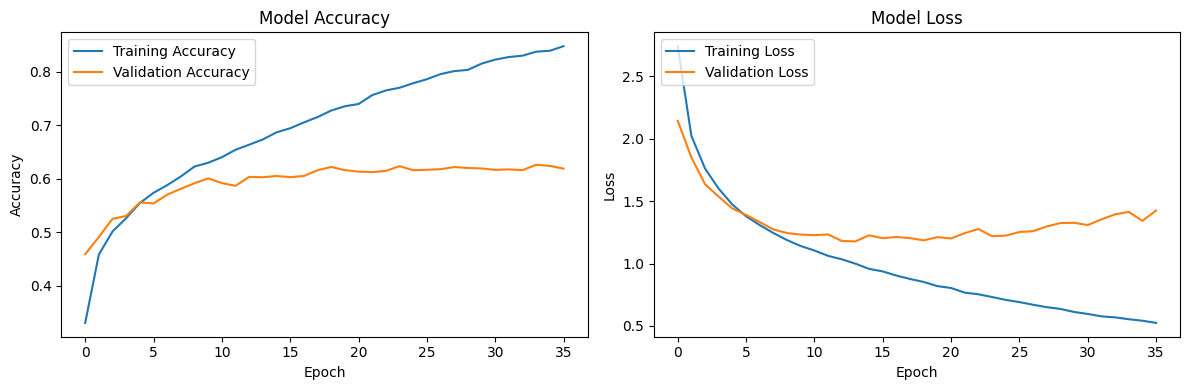

In [ ]:
import matplotlib.pyplot as plt

# vgg_history is the history object returned by model.fit()
history = vgg_history.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Loading and preprocess the image
image_path = '/content/dataset/test/surprise/PrivateTest_10072988.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image to match model's input size
image_array = img_to_array(image)  # Convert the image to a numpy array
image_array = image_array / 255.0  # Rescale the image

# adding an extra dimension to include batch size
image_array = tf.expand_dims(image_array, axis=0)

# image_array as input to model for prediction
predictions = model_1.predict(image_array)
print(predictions)

1/1 [==============================] - 0s 85ms/step
[[2.7655115e-04 5.4590632e-08 8.1866160e-03 4.1107929e-04 2.8052281e-03
  1.0803201e-04 9.8821241e-01]]


In [ ]:
import numpy as np

predictions = np.array(predictions)
# Get the index of the highest value
predicted_class_index = np.argmax(predictions)
# Mappinng the index to the class name
class_names = ['Angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_class = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class}")

The predicted class is: surprise


In [ ]:
#save  the vgg model
model_1.save('vgg_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Download the saved model
from google.colab import files
files.download('vgg_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
     brightness_range=[0.8, 1.2]
)

# Load images from directories for Training
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

# Load images from directories for Validation
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
#Pretrained Resnet Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-20]:
    layer.trainable = False
x = base_model.output
#x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.25)(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
#x = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(x)
#x = BatchNormalization()(x)
#x = Dropout(0.25)(x)
#x = Dense(128, activation='relu', kernel_regularizer=l2(0.0005))(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model_res = Model(inputs=base_model.input, outputs=predictions)
model_res.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_res.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, start_from_epoch=25)
res_history = model_res.fit(train_generator, validation_data=validation_generator, epochs=100,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
340/718 [=============>................] - ETA: 5:19 - loss: 3.0585 - accuracy: 0.1517

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)
model_res.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=25)

res_history = model_res.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=[early_stopping, reduce_lr])


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/100
718/718 [==============================] - 657s 908ms/step - loss: 2.5197 - accuracy: 0.2496 - val_loss: 2.3642 - val_accuracy: 0.2581 - lr: 1.0000e-04
Epoch 2/100
718/718 [==============================] - 644s 897ms/step - loss: 2.2574 - accuracy: 0.3252 - val_loss: 3.7978 - val_accuracy: 0.2538 - lr: 1.0000e-04
Epoch 3/100
718/718 [==============================] - 653s 909ms/step - loss: 2.1597 - accuracy: 0.3543 - val_loss: 5.0409 - val_accuracy: 0.2857 - lr: 1.0000e-04
Epoch 4/100
718/718 [==============================] - 656s 913ms/step - loss: 2.1114 - accuracy: 0.3693 - val_loss: 7.9494 - val_accuracy: 0.2513 - lr: 1.0000e-04
Epoch 5/100
220/718 [========>.....................] - ETA: 6:18 - loss: 2.0737 - accuracy: 0.3753

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)
model_res.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, start_from_epoch=25)

res_history = model_res.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=[early_stopping, reduce_lr])


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/100
359/359 [==============================] - 587s 2s/step - loss: 2.9175 - accuracy: 0.1684 - val_loss: 2.1773 - val_accuracy: 0.1771 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - 588s 2s/step - loss: 2.5804 - accuracy: 0.1971 - val_loss: 2.2127 - val_accuracy: 0.2782 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - 582s 2s/step - loss: 2.3779 - accuracy: 0.2385 - val_loss: 2.1323 - val_accuracy: 0.2662 - lr: 1.0000e-04
Epoch 4/100
359/359 [==============================] - 581s 2s/step - loss: 2.2585 - accuracy: 0.2825 - val_loss: 2.0200 - val_accuracy: 0.3353 - lr: 1.0000e-04
Epoch 5/100
359/359 [==============================] - 579s 2s/step - loss: 2.1799 - accuracy: 0.3015 - val_loss: 2.1902 - val_accuracy: 0.1918 - lr: 1.0000e-04
Epoch 6/100
359/359 [==============================] - 586s 2s/step - loss: 2.1002 - accuracy: 0.3236 - val_lo

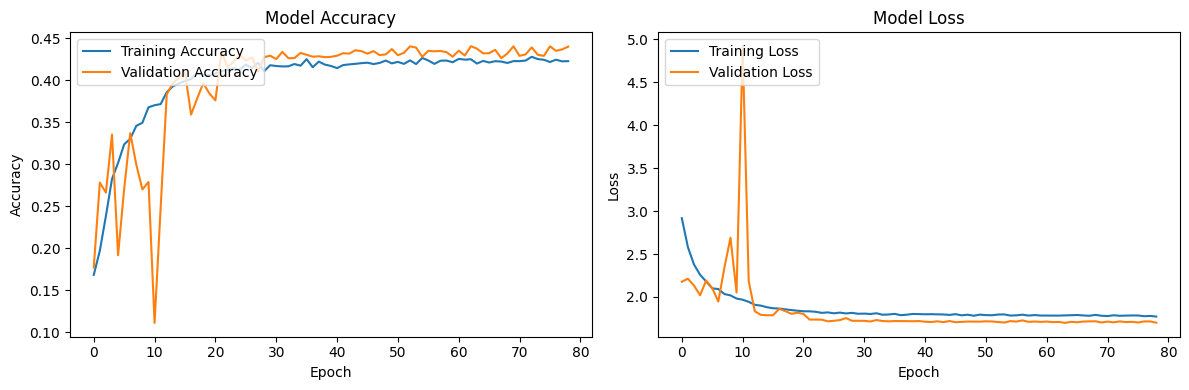

In [ ]:
import matplotlib.pyplot as plt

# res_history is the history object returned by model.fit()
history = res_history.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Loading and preprocess the image
image_path = '/content/dataset/test/surprise/PrivateTest_10072988.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image to match model's input size
image_array = img_to_array(image)  # Convert the image to a numpy array
image_array = image_array / 255.0  # Rescale the image

# adding an extra dimension to include batch size
image_array = tf.expand_dims(image_array, axis=0)

# image_array as input to model for prediction
predictions = model_res.predict(image_array)
print(predictions)

1/1 [==============================] - 1s 989ms/step
[[0.02377843 0.00604509 0.20543946 0.01202283 0.00995727 0.01424771
  0.7285092 ]]


In [ ]:
import numpy as np

predictions = np.array(predictions)
# Get the index of the highest value
predicted_class_index = np.argmax(predictions)
# Mappinng the index to the class name
class_names = ['Angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_class = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class}")

The predicted class is: surprise


In [ ]:
#save  the resnet model
model_res.save('resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Download the saved model
from google.colab import files
files.download('resnet_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Pretrained Inception Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

model_inc= Model(inputs=base_model.input, outputs=predictions)
model_inc.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, start_from_epoch=25)

inc_history = model_inc.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=[early_stopping, reduce_lr])


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/100
359/359 [==============================] - 369s 1s/step - loss: 2.7329 - accuracy: 0.2761 - val_loss: 1.8682 - val_accuracy: 0.4125 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - 359s 1s/step - loss: 2.3156 - accuracy: 0.3518 - val_loss: 1.7901 - val_accuracy: 0.4470 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - 362s 1s/step - loss: 2.1591 - accuracy: 0.3897 - val_loss: 1.7759 - val_accuracy: 0.4487 - lr: 1.0000e-04
Epoch 4/100
359/359 [==============================] - 362s 1s/step - loss: 2.0197 - accuracy: 0.4102 - val_loss: 1.7311 - val_accuracy: 0.4729 - lr: 1.0000e-04
Epoch 5/100
359/359 [==============================] - 362s 1s/step - loss: 1.9501 - accuracy: 0.4220 - val_loss: 1.7106 - val_accuracy: 0.4806 - lr: 1.0000e-04
Epoch 6/100
359/359 [========================

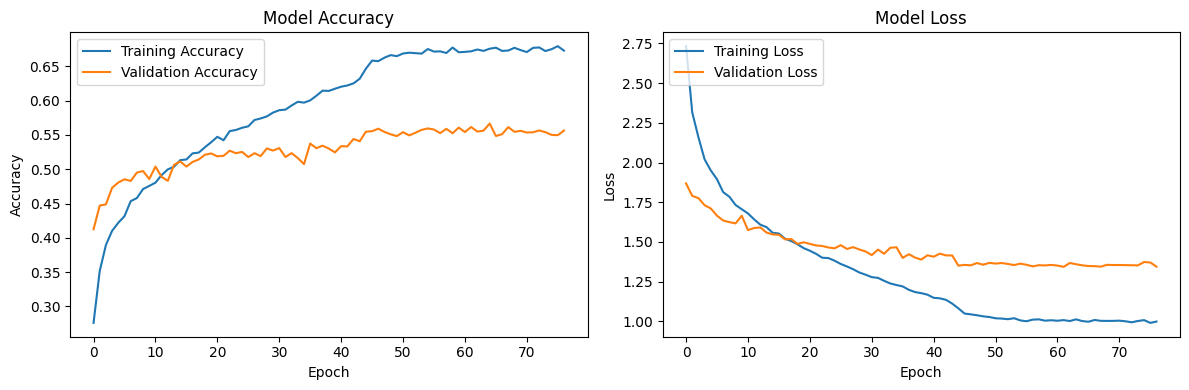

In [ ]:
import matplotlib.pyplot as plt

# inc_history is the history object returned by model.fit()
history = inc_history.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Loading and preprocess the image
image_path = '/content/dataset/test/surprise/PrivateTest_10072988.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image to match model's input size
image_array = img_to_array(image)  # Convert the image to a numpy array
image_array = image_array / 255.0  # Rescale the image

# adding an extra dimension to include batch size
image_array = tf.expand_dims(image_array, axis=0)

# image_array as input to model for prediction
predictions = model_inc.predict(image_array)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[7.3474941e-05 5.0013656e-05 8.1835771e-03 3.4150584e-05 4.6461755e-05
  3.2941072e-05 9.9157941e-01]]


In [ ]:
import numpy as np

predictions = np.array(predictions)
# Get the index of the highest value
predicted_class_index = np.argmax(predictions)
# Mappinng the index to the class name
class_names = ['Angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_class = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class}")

The predicted class is: surprise


In [ ]:
#save  the Inception model
model_inc.save('inception_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#download the
from google.colab import files
files.download('inception_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
     brightness_range=[0.8, 1.2]
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.


In [ ]:
#Custom model built for emotion detection
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

class EmotionCNN:
    def __init__(self):
        super(EmotionCNN, self).__init__()
        self.model = Sequential([
            Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(256, (3, 3), activation='relu'),
            Conv2D(256, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
            Dropout(0.5),
            Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
            Dropout(0.5),
            Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
            Dropout(0.5),
            Dense(7, activation='softmax')
        ])
        self.model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, train_generator, validation_generator, epochs=100):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True,start_from_epoch=40)
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
        hist_1=self.model.fit(train_generator, validation_data=validation_generator, epochs=epochs,callbacks=[early_stopping,reduce_lr])
        return hist_1

emotion_cnn = EmotionCNN()
hist=emotion_cnn.train(train_generator, validation_generator)

Epoch 1/100
  9/404 [..............................] - ETA: 21:50 - loss: 2.1213 - accuracy: 0.2361

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode= 'nearest'
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall
import tensorflow_addons as tfa

class EmotionCNN:
    def __init__(self):
        super(EmotionCNN, self).__init__()
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(1024, activation='relu', kernel_regularizer=l2(0.0001)),
            #Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
            Dropout(0.5),
            Dense(7, activation='softmax')
        ])
        self.model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall(),tfa.metrics.F1Score(num_classes=7,average='macro')])

    def train(self, train_generator, validation_generator, epochs=100):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True,start_from_epoch=30)
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
        hist_1=self.model.fit(train_generator, validation_data=validation_generator, epochs=epochs,callbacks=[early_stopping,reduce_lr])
        return hist_1

    def predict(self, img):
        return self.model.predict(img)

In [ ]:
emotion_cnn = EmotionCNN()

In [ ]:
hist=emotion_cnn.train(train_generator, validation_generator)

Epoch 1/100
359/359 [==============================] - 995s 3s/step - loss: 1.8727 - accuracy: 0.2887 - precision_2: 0.5530 - recall_2: 0.0148 - f1_score: 0.1868 - val_loss: 1.7265 - val_accuracy: 0.3696 - val_precision_2: 0.7139 - val_recall_2: 0.0456 - val_f1_score: 0.2627 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - 1003s 3s/step - loss: 1.6556 - accuracy: 0.3886 - precision_2: 0.6869 - recall_2: 0.1098 - f1_score: 0.3018 - val_loss: 1.6155 - val_accuracy: 0.4071 - val_precision_2: 0.7594 - val_recall_2: 0.1165 - val_f1_score: 0.3108 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - 1006s 3s/step - loss: 1.5128 - accuracy: 0.4451 - precision_2: 0.7205 - recall_2: 0.1827 - f1_score: 0.3601 - val_loss: 1.5111 - val_accuracy: 0.4437 - val_precision_2: 0.7564 - val_recall_2: 0.1704 - val_f1_score: 0.3616 - lr: 1.0000e-04
Epoch 4/100
359/359 [==============================] - 1008s 3s/step - loss: 1.3879 - accuracy: 0.4997 - precision_2: 0

In [ ]:
histr=hist.history

In [ ]:
histr.keys()

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2', 'val_f1_score', 'lr'])

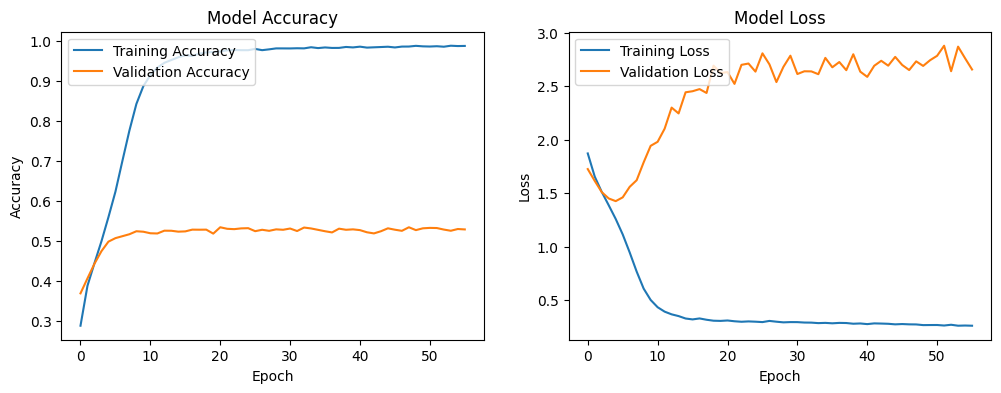

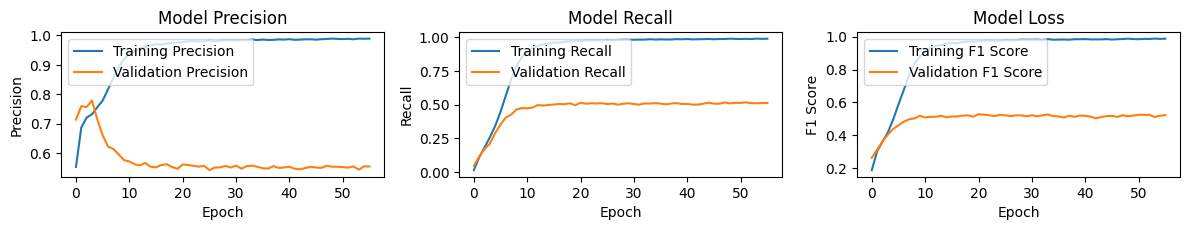

In [ ]:
import matplotlib.pyplot as plt

# hist is the history object returned by model.fit() of emotion_cnn
history = hist.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Plotting training & validation Precision values
plt.figure(figsize=(12, 4))
plt.subplot(2, 3, 1)
plt.plot(history['precision_2'], label='Training Precision')
plt.plot(history['val_precision_2'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='upper left')

# Plotting training & validation Recall values
plt.subplot(2, 3, 2)
plt.plot(history['recall_2'], label='Training Recall')
plt.plot(history['val_recall_2'], label='Validation Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(loc='upper left')

# Plotting training & validation F1 Score values
plt.subplot(2, 3, 3)
plt.plot(history['f1_score'], label='Training F1 Score')
plt.plot(history['val_f1_score'], label='Validation F1 Score')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
#save  the Emotion CNN  Custom model
emotion_cnn.model.save('emotion_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('emotion_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import tensorflow as tf

# Load the image in grayscale mode
image_path = '/content/dataset/test/surprise/PrivateTest_12641070.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224, 224))  # Resize the image to match model's input size
img = img / 255.0  # Rescale the image
img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale (224, 224, 1)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make the prediction
prediction = emotion_cnn.predict(img)
predicted_class_index = np.argmax(prediction, axis=1)
class_names = ['Angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_class = class_names[predicted_class_index[0]]

print(f"The predicted class is: {predicted_class}")

1/1 [==============================] - 0s 72ms/step
The predicted class is: happy


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode= 'nearest'
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='training',
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset='validation',
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
#Final Custom Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.22))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,start_from_epoch=30)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
emotion_hist=model.fit(train_generator, validation_data=validation_generator, epochs=100,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
359/359 [==============================] - 1353s 4s/step - loss: 1.8221 - accuracy: 0.2429 - val_loss: 1.7208 - val_accuracy: 0.3350 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - 1363s 4s/step - loss: 1.6915 - accuracy: 0.3272 - val_loss: 1.5856 - val_accuracy: 0.3928 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - 1370s 4s/step - loss: 1.5884 - accuracy: 0.3820 - val_loss: 1.5096 - val_accuracy: 0.4173 - lr: 1.0000e-04
Epoch 4/100
359/359 [==============================] - 1375s 4s/step - loss: 1.4836 - accuracy: 0.4230 - val_loss: 1.4135 - val_accuracy: 0.4581 - lr: 1.0000e-04
Epoch 5/100
359/359 [==============================] - 1377s 4s/step - loss: 1.3923 - accuracy: 0.4738 - val_loss: 1.3719 - val_accuracy: 0.4781 - lr: 1.0000e-04
Epoch 6/100
359/359 [==============================] - 1378s 4s/step - loss: 1.3025 - accuracy: 0.5086 - val_loss: 1.3375 - val_accuracy: 0.4940 - lr: 1.0000e-04
Epoch 7/100
359/359 [=======

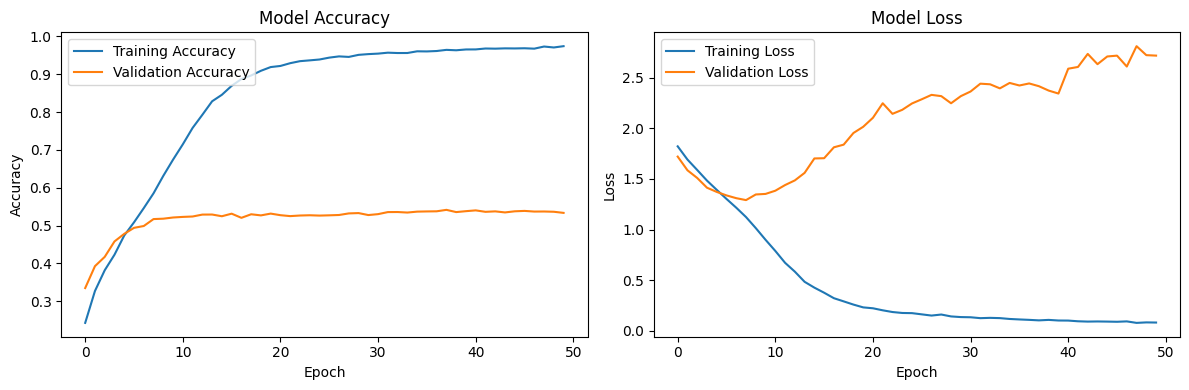

In [ ]:
import matplotlib.pyplot as plt

# emotion_hist is the history object returned by model.fit()
history = emotion_hist.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#save  the Emotion CNN  Custom model
model.save('emotion_cnn_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('emotion_cnn_new.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluate the model
evaluation = model.evaluate(validation_generator)
print(f'Validation Loss: {evaluation[0]}')
print(f'Validation Accuracy: {evaluation[1]}')

90/90 [==============================] - 47s 523ms/step - loss: 2.3435 - accuracy: 0.5381
Validation Loss: 2.343498706817627
Validation Accuracy: 0.5380595922470093


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Load images from directories
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
predict=model.predict(test_generator)


113/113 [==============================] - 57s 504ms/step


In [ ]:
predict

array([[2.1693580e-02, 7.8480487e-05, 1.0173905e-03, ..., 3.6427515e-04,
        4.0696625e-05, 6.2762275e-03],
       [6.4562475e-03, 7.4753171e-04, 4.1706252e-01, ..., 3.6080957e-03,
        5.0651270e-01, 2.6907550e-02],
       [3.6272730e-03, 3.4774197e-04, 2.3531620e-03, ..., 8.0109611e-02,
        9.0756148e-01, 5.1476364e-04],
       ...,
       [7.8520045e-04, 2.1212769e-05, 2.3176359e-01, ..., 1.6891856e-03,
        7.6542753e-01, 1.2978358e-04],
       [1.2863508e-01, 1.8419793e-02, 1.9552933e-02, ..., 2.3242457e-02,
        7.4357934e-02, 5.3575598e-03],
       [1.1921826e-09, 5.7610906e-11, 6.2501901e-03, ..., 5.4336119e-10,
        8.5766100e-13, 9.9374962e-01]], dtype=float32)

113/113 [==============================] - 56s 498ms/step


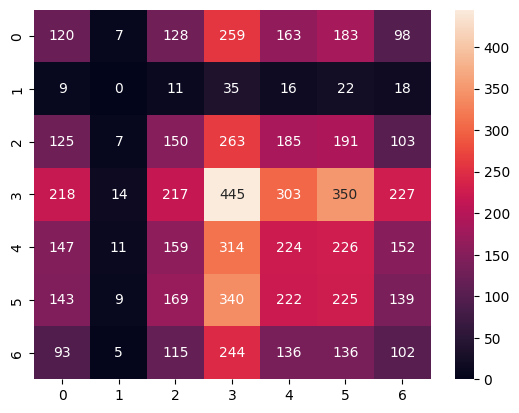

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_predict = model.predict(test_generator)
y_test_pred_classes = np.argmax(test_predict, axis=1)
y_test_true = test_generator.classes

cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Load images from directories
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import load_model
vgg_model=load_model('vgg_model.h5')

113/113 [==============================] - 129s 1s/step


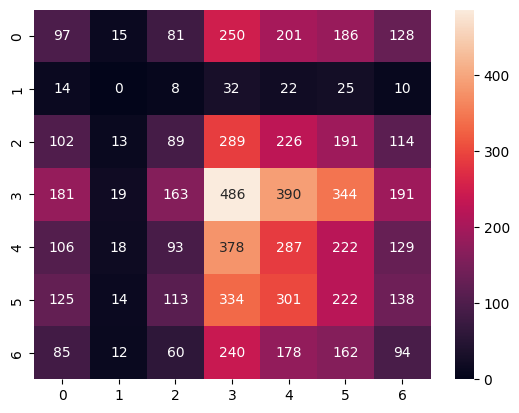

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_predict = vgg_model.predict(test_generator)
y_test_pred_classes = np.argmax(test_predict, axis=1)
y_test_true = test_generator.classes

cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
resnet_model=load_model('resnet_model.h5')

113/113 [==============================] - 124s 1s/step


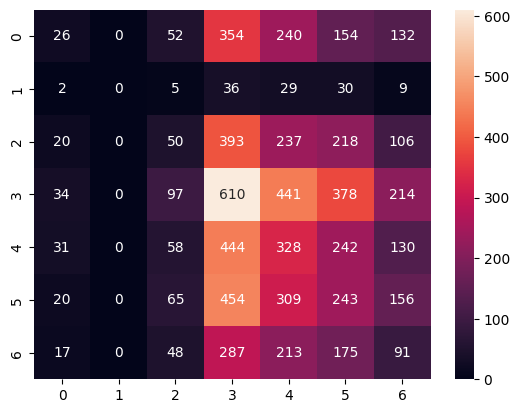

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_predict = resnet_model.predict(test_generator)
y_test_pred_classes = np.argmax(test_predict, axis=1)
y_test_true = test_generator.classes

cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [7]:
from tensorflow.keras.models import load_model
inception_model=load_model('inception_model.h5')

113/113 [==============================] - 47s 403ms/step


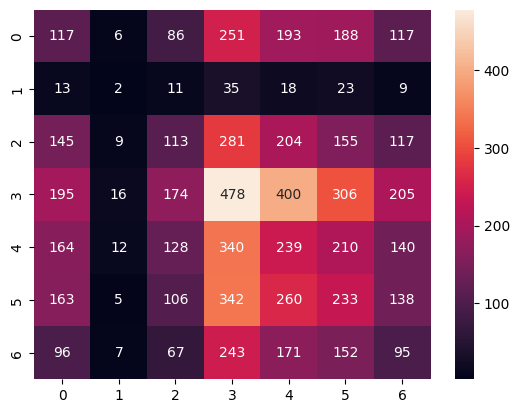

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_predict = inception_model.predict(test_generator)
y_test_pred_classes = np.argmax(test_predict, axis=1)
y_test_true = test_generator.classes

cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [14]:
from tensorflow.keras.models import load_model
emotion_cnn_model=load_model('emotion_cnn_new.h5')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Load images from directories
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


113/113 [==============================] - 52s 459ms/step


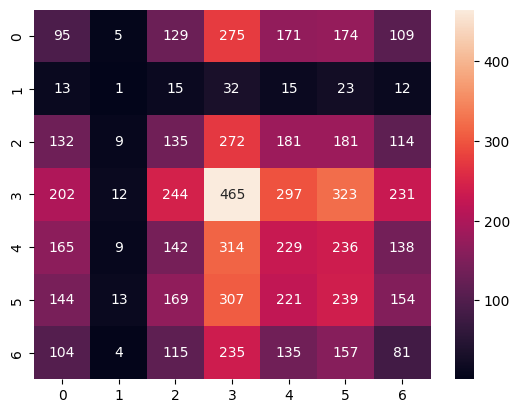

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_predict = emotion_cnn_model.predict(test_generator)
y_test_pred_classes = np.argmax(test_predict, axis=1)
y_test_true = test_generator.classes

cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()